In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('timeseries.csv')


In [3]:
df = df.dropna(subset=['time']) 
df.tail(20)
df = df[:96431:]
# df['time'][78886]
df.index = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
df =  df.drop(["time","H_sun","T2m","WS10m","Int"], axis = 1)
df

,G(i)
time,
2010-01-01 00:07:00,0
2010-01-01 01:07:00,0
2010-01-01 02:07:00,0
2010-01-01 03:07:00,0
2010-01-01 04:07:00,91.98
...,...
2020-12-31 18:07:00,0
2020-12-31 19:07:00,0
2020-12-31 20:07:00,0


In [4]:
df["Seconds"] = df.index.map(pd.Timestamp.timestamp)
df

,G(i),Seconds
time,,
2010-01-01 00:07:00,0,1.262304e+09
2010-01-01 01:07:00,0,1.262308e+09
2010-01-01 02:07:00,0,1.262312e+09
2010-01-01 03:07:00,0,1.262315e+09
2010-01-01 04:07:00,91.98,1.262319e+09
...,...,...
2020-12-31 18:07:00,0,1.609438e+09
2020-12-31 19:07:00,0,1.609442e+09
2020-12-31 20:07:00,0,1.609445e+09


In [5]:
day  = 60 * 60 * 24
year =  365.2425 * day
month = 30 * day

df ["day sin"] = np.sin(df['Seconds'] * ( 2 * np.pi /day))
df ["day cos"] = np.cos(df['Seconds'] * ( 2 * np.pi /day))
# df ["year sin"] = np.sin(df['Seconds'] * ( 2 * np.pi /year))
# df ["year cos"] = np.cos(df['Seconds'] * ( 2 * np.pi /year))
df
  

,G(i),Seconds,day sin,day cos
time,,,,
2010-01-01 00:07:00,0,1.262304e+09,0.030539,0.999534
2010-01-01 01:07:00,0,1.262308e+09,0.288196,0.957571
2010-01-01 02:07:00,0,1.262312e+09,0.526214,0.850352
2010-01-01 03:07:00,0,1.262315e+09,0.728371,0.685183
2010-01-01 04:07:00,91.98,1.262319e+09,0.880891,0.473320
...,...,...,...,...
2020-12-31 18:07:00,0,1.609438e+09,-0.999534,0.030539
2020-12-31 19:07:00,0,1.609442e+09,-0.957571,0.288196
2020-12-31 20:07:00,0,1.609445e+09,-0.850352,0.526214


In [6]:
df = df.drop(["Seconds"], axis = 1)
df.head(20)

,G(i),day sin,day cos
time,,,
2010-01-01 00:07:00,0,0.030539,0.999534
2010-01-01 01:07:00,0,0.288196,0.957571
2010-01-01 02:07:00,0,0.526214,0.850352
2010-01-01 03:07:00,0,0.728371,0.685183
2010-01-01 04:07:00,91.98,0.880891,0.473320
2010-01-01 05:07:00,432.28,0.973379,0.229200
2010-01-01 06:07:00,681.34,0.999534,-0.030539
2010-01-01 07:07:00,867.69,0.957571,-0.288196
2010-01-01 08:07:00,987.62,0.850352,-0.526214


In [7]:
df = df[:96431:]
df_multi = df.iloc[:,0:5] # removing the time column 
df.tail(30)
print(df_multi.head(10))
print(df_multi.dtypes)
# y = [x for x in df['Int'] if x == 0.0]
# print(y)b
# type(df_multi)


                        G(i)   day sin   day cos
time                                            
2010-01-01 00:07:00        0  0.030539  0.999534
2010-01-01 01:07:00        0  0.288196  0.957571
2010-01-01 02:07:00        0  0.526214  0.850352
2010-01-01 03:07:00        0  0.728371  0.685183
2010-01-01 04:07:00    91.98  0.880891  0.473320
2010-01-01 05:07:00   432.28  0.973379  0.229200
2010-01-01 06:07:00   681.34  0.999534 -0.030539
2010-01-01 07:07:00   867.69  0.957571 -0.288196
2010-01-01 08:07:00   987.62  0.850352 -0.526214
2010-01-01 09:07:00  1034.38  0.685183 -0.728371
G(i)        object
day sin    float64
day cos    float64
dtype: object


In [8]:

df_multi['G(i)'] = pd.to_numeric(df_multi['G(i)'], errors='coerce')
unique_types = df_multi['G(i)'].apply(type).unique()

print(unique_types)

[<class 'float'>]


In [9]:

df_scaled = df_multi.to_numpy()


In [10]:

print(df_scaled[0:5,:]) # this it the input
print(df_scaled[5,:]) # this is the output

[[0.00000000e+00 3.05385132e-02 9.99533591e-01]
 [0.00000000e+00 2.88196268e-01 9.57571361e-01]
 [0.00000000e+00 5.26213924e-01 8.50352225e-01]
 [0.00000000e+00 7.28370970e-01 6.85182990e-01]
 [9.19800000e+01 8.80890738e-01 4.73319667e-01]]
[4.32280000e+02 9.73379258e-01 2.29200391e-01]


In [11]:
def df_to_X_y(df_as_np, window_size=5):
#   df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size,:]]
    X.append(row)
    label = df_as_np[i+window_size,0]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)
print(X1[1])
print("slfejlksdjlfkjdslkjfjlk")
print(y1[0])
X1.shape, y1.shape

[[0.00000000e+00 2.88196268e-01 9.57571361e-01]
 [0.00000000e+00 5.26213924e-01 8.50352225e-01]
 [0.00000000e+00 7.28370970e-01 6.85182990e-01]
 [9.19800000e+01 8.80890738e-01 4.73319667e-01]
 [4.32280000e+02 9.73379258e-01 2.29200391e-01]]
slfejlksdjlfkjdslkjfjlk
432.28


((96426, 5, 3), (96426,))

In [13]:
X_train1, y_train1 = X1[:61367], y1[:61367]
X_val1, y_val1 = X1[61367:70127], y1[61367:70127] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[70128:], y1[70128:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((61367, 5, 3), (61367,), (8760, 5, 3), (8760,), (26298, 5, 3), (26298,))

In [14]:
X_train1[:,:,0]

array([[  0.  ,   0.  ,   0.  ,   0.  ,  91.98],
       [  0.  ,   0.  ,   0.  ,  91.98, 432.28],
       [  0.  ,   0.  ,  91.98, 432.28, 681.34],
       ...,
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ]])

In [15]:
print(np.mean(X_train1[:,:,0]))
np.std((X_train1[:,:,0]))
#  91.98, => -0.48
# 432.28 =>0.44

268.65040705916863


367.6635387737029

In [16]:
g_training_mean = np.mean( X_train1[ : ,: ,0])
g_training_std = np.std( X_train1[ : ,: ,0])
def preprocess(X):
    X[:,:,0] = (X[:,:,0] - g_training_mean)/ g_training_std
    return X


In [17]:
preprocess(X_train1)
preprocess(X_val1)
preprocess(X_test1)


array([[[-0.73069635,  0.03053851,  0.99953359],
        [-0.73069635,  0.28819627,  0.95757136],
        [-0.73069635,  0.52621392,  0.85035222],
        [-0.73069635,  0.72837097,  0.68518299],
        [-0.65813001,  0.88089074,  0.47331967]],

       [[-0.73069635,  0.28819627,  0.95757136],
        [-0.73069635,  0.52621392,  0.85035222],
        [-0.73069635,  0.72837097,  0.68518299],
        [-0.65813001,  0.88089074,  0.47331967],
        [ 0.33941248,  0.97337926,  0.22920039]],

       [[-0.73069635,  0.52621392,  0.85035222],
        [-0.73069635,  0.72837097,  0.68518299],
        [-0.65813001,  0.88089074,  0.47331967],
        [ 0.33941248,  0.97337926,  0.22920039],
        [ 1.08022567,  0.99953359, -0.03053851]],

       ...,

       [[-0.73069635, -0.72837097, -0.68518299],
        [-0.73069635, -0.88089074, -0.47331967],
        [-0.73069635, -0.97337926, -0.22920039],
        [-0.73069635, -0.99953359,  0.03053851],
        [-0.73069635, -0.95757136,  0.28819627]],


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 3)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='min')

In [21]:
cp1 = ModelCheckpoint('model_G(I)_TIME/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [22]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1,early_stopping])

Epoch 1/50
1912/1918 [============================>.] - ETA: 0s - loss: 64630.2734 - root_mean_squared_error: 254.2249

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 41s 19ms/step - loss: 64477.2383 - root_mean_squared_error: 253.9237 - val_loss: 12663.2168 - val_root_mean_squared_error: 112.5310
Epoch 2/50
1914/1918 [============================>.] - ETA: 0s - loss: 9399.0879 - root_mean_squared_error: 96.9489

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 34s 18ms/step - loss: 9408.5947 - root_mean_squared_error: 96.9979 - val_loss: 8851.8398 - val_root_mean_squared_error: 94.0842
Epoch 3/50
1918/1918 [==============================] - ETA: 0s - loss: 7496.4390 - root_mean_squared_error: 86.5820

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 32s 17ms/step - loss: 7496.4390 - root_mean_squared_error: 86.5820 - val_loss: 7944.1670 - val_root_mean_squared_error: 89.1301
Epoch 4/50
1913/1918 [============================>.] - ETA: 0s - loss: 6988.2441 - root_mean_squared_error: 83.5957

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 32s 17ms/step - loss: 6981.5874 - root_mean_squared_error: 83.5559 - val_loss: 7836.7925 - val_root_mean_squared_error: 88.5257
Epoch 5/50
1918/1918 [==============================] - 16s 8ms/step - loss: 6812.5103 - root_mean_squared_error: 82.5379 - val_loss: 8316.8740 - val_root_mean_squared_error: 91.1969
Epoch 6/50
1911/1918 [============================>.] - ETA: 0s - loss: 6730.0952 - root_mean_squared_error: 82.0372

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 35s 18ms/step - loss: 6732.9106 - root_mean_squared_error: 82.0543 - val_loss: 7553.5015 - val_root_mean_squared_error: 86.9109
Epoch 7/50
1918/1918 [==============================] - 14s 8ms/step - loss: 6680.5078 - root_mean_squared_error: 81.7344 - val_loss: 7720.9277 - val_root_mean_squared_error: 87.8688
Epoch 8/50
1915/1918 [============================>.] - ETA: 0s - loss: 6656.1782 - root_mean_squared_error: 81.5854

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 35s 18ms/step - loss: 6656.6958 - root_mean_squared_error: 81.5886 - val_loss: 7531.1167 - val_root_mean_squared_error: 86.7820
Epoch 9/50
1918/1918 [==============================] - 17s 9ms/step - loss: 6629.6611 - root_mean_squared_error: 81.4227 - val_loss: 7543.9346 - val_root_mean_squared_error: 86.8558
Epoch 10/50
1917/1918 [============================>.] - ETA: 0s - loss: 6610.7905 - root_mean_squared_error: 81.3068

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 38s 20ms/step - loss: 6609.6709 - root_mean_squared_error: 81.2999 - val_loss: 7511.2861 - val_root_mean_squared_error: 86.6677
Epoch 11/50
1914/1918 [============================>.] - ETA: 0s - loss: 6567.9131 - root_mean_squared_error: 81.0427

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 39s 20ms/step - loss: 6568.9336 - root_mean_squared_error: 81.0490 - val_loss: 7485.2866 - val_root_mean_squared_error: 86.5175
Epoch 12/50
1918/1918 [==============================] - 17s 9ms/step - loss: 6564.1738 - root_mean_squared_error: 81.0196 - val_loss: 7513.3198 - val_root_mean_squared_error: 86.6794
Epoch 13/50
1918/1918 [==============================] - 18s 9ms/step - loss: 6534.4951 - root_mean_squared_error: 80.8362 - val_loss: 7490.1675 - val_root_mean_squared_error: 86.5458
Epoch 14/50
1917/1918 [============================>.] - ETA: 0s - loss: 6529.5630 - root_mean_squared_error: 80.8057

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 34s 18ms/step - loss: 6527.3457 - root_mean_squared_error: 80.7920 - val_loss: 7477.2095 - val_root_mean_squared_error: 86.4709
Epoch 15/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6516.5830 - root_mean_squared_error: 80.7254 - val_loss: 7551.8638 - val_root_mean_squared_error: 86.9015
Epoch 16/50
1916/1918 [============================>.] - ETA: 0s - loss: 6504.1421 - root_mean_squared_error: 80.6483

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 39s 20ms/step - loss: 6517.9810 - root_mean_squared_error: 80.7340 - val_loss: 7415.8091 - val_root_mean_squared_error: 86.1151
Epoch 17/50
1918/1918 [==============================] - 17s 9ms/step - loss: 6495.8384 - root_mean_squared_error: 80.5968 - val_loss: 7449.7300 - val_root_mean_squared_error: 86.3118
Epoch 18/50
1918/1918 [==============================] - 15s 8ms/step - loss: 6475.9365 - root_mean_squared_error: 80.4732 - val_loss: 7421.9854 - val_root_mean_squared_error: 86.1509
Epoch 19/50
1918/1918 [==============================] - 15s 8ms/step - loss: 6470.1685 - root_mean_squared_error: 80.4374 - val_loss: 7485.9453 - val_root_mean_squared_error: 86.5214
Epoch 20/50
1918/1918 [==============================] - 17s 9ms/step - loss: 6462.4175 - root_mean_squared_error: 80.3892 - val_loss: 7487.1821 - val_root_mean_squared_error: 86.5285
Epoch 21/50
1918/1918 [==============================] - 17s 9ms/step - loss: 6444.8809 - r

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 42s 22ms/step - loss: 6439.3550 - root_mean_squared_error: 80.2456 - val_loss: 7406.4980 - val_root_mean_squared_error: 86.0610
Epoch 24/50
1916/1918 [============================>.] - ETA: 0s - loss: 6426.4287 - root_mean_squared_error: 80.1650

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 52s 27ms/step - loss: 6423.4116 - root_mean_squared_error: 80.1462 - val_loss: 7345.2417 - val_root_mean_squared_error: 85.7044
Epoch 25/50
1918/1918 [==============================] - 26s 14ms/step - loss: 6412.6948 - root_mean_squared_error: 80.0793 - val_loss: 7374.3853 - val_root_mean_squared_error: 85.8742
Epoch 26/50
1918/1918 [==============================] - 27s 14ms/step - loss: 6410.4194 - root_mean_squared_error: 80.0651 - val_loss: 7423.3154 - val_root_mean_squared_error: 86.1587
Epoch 27/50
1918/1918 [==============================] - 25s 13ms/step - loss: 6407.9512 - root_mean_squared_error: 80.0497 - val_loss: 7372.6182 - val_root_mean_squared_error: 85.8640
Epoch 28/50
1917/1918 [============================>.] - ETA: 0s - loss: 6394.2612 - root_mean_squared_error: 79.9641

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 39s 21ms/step - loss: 6393.9058 - root_mean_squared_error: 79.9619 - val_loss: 7325.1733 - val_root_mean_squared_error: 85.5872
Epoch 29/50
1915/1918 [============================>.] - ETA: 0s - loss: 6376.8442 - root_mean_squared_error: 79.8551

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 39s 20ms/step - loss: 6373.8848 - root_mean_squared_error: 79.8366 - val_loss: 7319.2148 - val_root_mean_squared_error: 85.5524
Epoch 30/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6375.4199 - root_mean_squared_error: 79.8462 - val_loss: 7413.2061 - val_root_mean_squared_error: 86.1000
Epoch 31/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6363.5205 - root_mean_squared_error: 79.7717 - val_loss: 7336.7324 - val_root_mean_squared_error: 85.6547
Epoch 32/50
1912/1918 [============================>.] - ETA: 0s - loss: 6371.2383 - root_mean_squared_error: 79.8200

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 44s 23ms/step - loss: 6368.9268 - root_mean_squared_error: 79.8056 - val_loss: 7304.9360 - val_root_mean_squared_error: 85.4689
Epoch 33/50
1918/1918 [==============================] - 22s 11ms/step - loss: 6357.2720 - root_mean_squared_error: 79.7325 - val_loss: 7375.7998 - val_root_mean_squared_error: 85.8825
Epoch 34/50
1918/1918 [==============================] - 25s 13ms/step - loss: 6355.7627 - root_mean_squared_error: 79.7230 - val_loss: 7313.1440 - val_root_mean_squared_error: 85.5169
Epoch 35/50
1918/1918 [==============================] - 23s 12ms/step - loss: 6333.4155 - root_mean_squared_error: 79.5828 - val_loss: 7381.7153 - val_root_mean_squared_error: 85.9169
Epoch 36/50
1918/1918 [==============================] - 23s 12ms/step - loss: 6338.2949 - root_mean_squared_error: 79.6134 - val_loss: 7433.4092 - val_root_mean_squared_error: 86.2172
Epoch 37/50
1918/1918 [==============================] - 22s 11ms/step - loss: 6325.820

INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


INFO:tensorflow:Assets written to: model_G(I)_TIME\assets


1918/1918 [==============================] - 41s 21ms/step - loss: 6321.2783 - root_mean_squared_error: 79.5065 - val_loss: 7297.4648 - val_root_mean_squared_error: 85.4252
Epoch 41/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6301.1030 - root_mean_squared_error: 79.3795 - val_loss: 7315.5215 - val_root_mean_squared_error: 85.5308
Epoch 42/50
1918/1918 [==============================] - 19s 10ms/step - loss: 6288.0801 - root_mean_squared_error: 79.2974 - val_loss: 7372.9463 - val_root_mean_squared_error: 85.8659
Epoch 43/50
1918/1918 [==============================] - 20s 11ms/step - loss: 6291.0938 - root_mean_squared_error: 79.3164 - val_loss: 7341.7104 - val_root_mean_squared_error: 85.6838
Epoch 44/50
1918/1918 [==============================] - 20s 10ms/step - loss: 6287.7441 - root_mean_squared_error: 79.2953 - val_loss: 7331.2412 - val_root_mean_squared_error: 85.6227
Epoch 45/50
1918/1918 [==============================] - 21s 11ms/step - loss: 6272.009

In [23]:
from tensorflow.keras.models import load_model
model1 = load_model('model_G(I)_TIME/')

In [24]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results.head(30)

1918/1918 [==============================] - 8s 4ms/step


,Train Predictions,Actuals
0,340.261597,432.28
1,677.122498,681.34
2,865.806091,867.69
3,990.778320,987.62
4,1020.761902,1034.38
5,959.278198,998.94
6,852.735718,887.09
7,656.766296,702.60
8,437.702087,472.43
9,198.933197,208.97


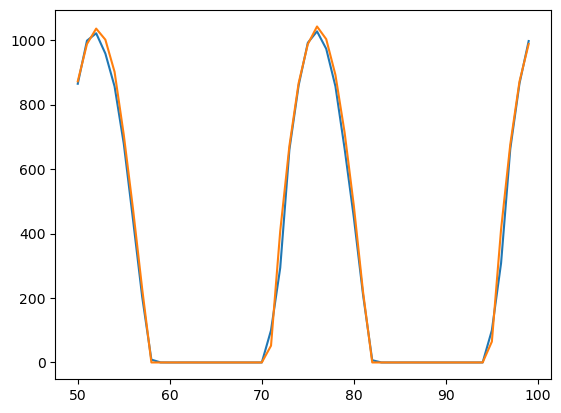

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [26]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results.head(20)

274/274 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,99.763573,113.43
1,365.931366,434.08
2,673.734253,702.59
3,881.408203,903.86
4,1025.552612,1025.43
5,1059.540649,1073.10
6,1010.803406,1036.55
7,904.392090,915.12
8,687.521118,731.26
9,478.297119,491.41


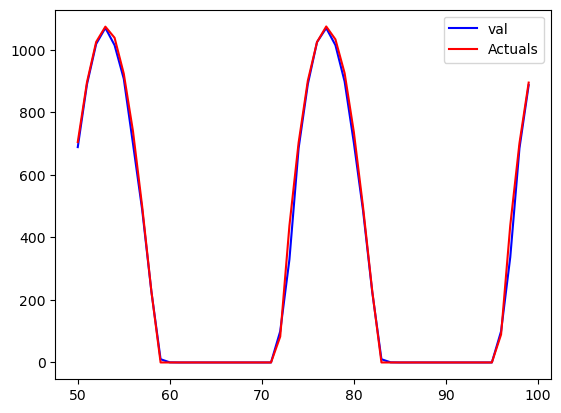

In [28]:
plt.plot(val_results['Val Predictions'][50:100],label="val", color="blue")
plt.plot(val_results['Actuals'][50:100],label="Actuals", color="red")
plt.legend()

In [29]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

822/822 [==============================] - 3s 3ms/step


,Test Predictions,Actuals
0,264.442902,393.44
1,654.346497,665.81
2,855.214050,869.26
3,993.647766,995.45
4,1041.444580,1054.94
...,...,...
26293,-0.026129,0.00
26294,0.028768,0.00
26295,-0.028403,0.00
26296,-0.040726,0.00


In [30]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=50, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

822/822 [==============================] - 3s 3ms/step


(       Predictions  Actuals
 0       264.442902   393.44
 1       654.346497   665.81
 2       855.214050   869.26
 3       993.647766   995.45
 4      1041.444580  1054.94
 ...            ...      ...
 26293    -0.026129     0.00
 26294     0.028768     0.00
 26295    -0.028403     0.00
 26296    -0.040726     0.00
 26297    -0.045057     0.00
 
 [26298 rows x 2 columns],
 5722.108435511027)

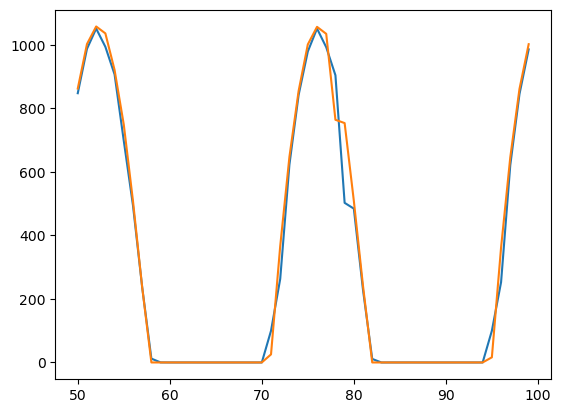

In [31]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [33]:
df_multi.iloc[78889:78920,:]

,G(i),day sin,day cos
time,,,
2019-01-01 01:07:00,0.00,0.288196,0.957571
2019-01-01 02:07:00,0.00,0.526214,0.850352
2019-01-01 03:07:00,0.00,0.728371,0.685183
2019-01-01 04:07:00,46.98,0.880891,0.473320
2019-01-01 05:07:00,449.76,0.973379,0.229200
2019-01-01 06:07:00,707.26,0.999534,-0.030539
2019-01-01 07:07:00,902.77,0.957571,-0.288196
2019-01-01 08:07:00,1024.41,0.850352,-0.526214
2019-01-01 09:07:00,1072.31,0.685183,-0.728371


In [34]:
kkk = df_multi.iloc[78885:78890,:]
time = str(df_multi.index[78889])
print(time)
print(type(kkk))
print(kkk.shape)
reshaped_array = np.reshape(kkk.to_numpy(), (1, 5, 3))
preprocess(reshaped_array)
print(reshaped_array)
predictions = model1.predict(reshaped_array)
print(predictions[0][0])

# original= scaler.inverse_transform(predictions)
# print(original)
# predictions
# inverse_data = np.zeros((len(predictions), scaler.shape[1]))

2019-01-01 01:07:00
<class 'pandas.core.frame.DataFrame'>
(5, 3)
[[[-0.73069635 -0.68518299  0.72837097]
  [-0.73069635 -0.47331967  0.88089074]
  [-0.73069635 -0.22920039  0.97337926]
  [-0.73069635  0.03053851  0.99953359]
  [-0.73069635  0.28819627  0.95757136]]]
1/1 [==============================] - 0s 45ms/step
-0.04116881


In [35]:
from datetime import datetime, timedelta

def get_next_24_hours_from_datetime(start_datetime_str):
    """
    Generate a list of strings representing the datetime for the next 24 hours,
    given the start datetime in the format "YYYY-MM-DD HH:MM:SS".

    Parameters:
    - start_datetime_str (str): The starting datetime in the format "YYYY-MM-DD HH:MM:SS".

    Returns:
    - list of strings: Each string contains the datetime for the next 24 hours in the format "YYYY-MM-DD HH:MM:SS".
    """
    # Convert the input string to a datetime object
    start_datetime = datetime.strptime(start_datetime_str, "%Y-%m-%d %H:%M:%S")

    # Initialize a list to hold the future datetimes in the desired format
    future_datetimes_formatted = []
    day_sin= []
    day_cos= []

    # Calculate and format the next 24 hours
    for i in range(2, 26):  # Start from 1 to include the next hour immediately
        future_datetime = start_datetime + timedelta(hours=i)
        timeStamp = future_datetime.timestamp()
        day_sin_ = np.sin(timeStamp * ( 2 * np.pi /day))
        day_cos_ = np.cos(timeStamp * ( 2 * np.pi /day))
        day_sin.append(day_sin_)
        day_cos.append(day_cos_)
        
    return day_cos,day_sin


In [36]:
day_cos, day_sin = get_next_24_hours_from_datetime(time)

In [38]:

input = df_scaled[78885:78890,:]  # Initial input extracted from your original scaled DataFrame
output_scaled = []  
output_not_scaled = [] 

for i in range(24):
    # Reshape input for the model prediction
    reshaped_array = np.reshape(input, (1, 5, 3))
    preprocess(reshaped_array)
    prediction = []
    prediction.append( model1.predict(reshaped_array)[0][0])
    prediction.append(day_sin[i])
    prediction.append(day_cos[i])
    
    
    
    # Reshape the prediction to match the input shape if necessary
    # Adjust the reshaping based on the actual shape of your model's output
    prediction_reshaped = np.reshape(prediction, (1, 3))
    input = np.reshape(input, (5, 3))  # Ensure input is in the correct shape before appending
    # Append the new prediction at the end of the input array
    input = np.vstack([input, prediction_reshaped])  # Stack vertically to add as a new row
    
    # Remove the oldest entry to maintain the sliding window of input data
    input = input[1:, :]  # Keep the last 5 entries, including the newly added prediction
    
    output_scaled.append(prediction[0])


# print(output_scaled)  # Remains empty, uncomment if needed
print(output_scaled)  # Print or process the predictions as 




1/1 [==============================] - 0s 48ms/step
[-0.03995049, -0.009817481, 99.68768, 350.03638, 614.752, 835.05597, 978.7041, 915.2076, 791.64276, 688.01935, 445.7812, 254.03961, 62.512157, 0.95173085, 0.3660965, -0.04393184, -0.07812345, -0.011461735, -0.028522372, -0.040802002, -0.045092106, -0.041429043, -0.03064096, -0.021134853]


In [39]:
print("this is the real scaled output")
for i in output_scaled:
    print(i)

this is the real scaled output
-0.03995049
-0.009817481
99.68768
350.03638
614.752
835.05597
978.7041
915.2076
791.64276
688.01935
445.7812
254.03961
62.512157
0.95173085
0.3660965
-0.04393184
-0.07812345
-0.011461735
-0.028522372
-0.040802002
-0.045092106
-0.041429043
-0.03064096
-0.021134853
